In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet121
from keras.applications.resnet50 import preprocess_input
import cv2

import os
print(os.listdir("/content/drive/My Drive/Dataset"))

['Class1', 'Class2']


In [ ]:
!pip install h5py pyyaml

In [2]:
Class1 = "/content/drive/My Drive/Dataset/Class1"
Class2 = "/content/drive/My Drive/Dataset/Class2"
CLASS_NAMES = ['Class1', 'Class2']
DIR = [Class1, Class2]

In [ ]:
def create_training_data(class_name, curr_dir,img_size):

    X = []
    y = []
    for num,i in enumerate(curr_dir):
        for j in tqdm(os.listdir(i)):
            path = os.path.join(i,j)
            img = cv2.imread(path, 1)
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            try:
                img = cv2.resize(img, img_size)
            except:
                continue
                
            X.append(np.array(img))
            y.append(class_name[num])
    
    return X,y

In [ ]:
X,y = create_training_data(CLASS_NAMES, DIR, (200,200))

100%|██████████| 114/114 [01:37<00:00,  1.40it/s]


In [ ]:
def view_random_images(X, y, random_state = 4):
    np.random.seed(random_state)
    plt.figure(figsize = (6,12))    
    
    for i in range(10):
        plt.subplot(5,2,i+1)
        num = np.random.randint(len(X))
        plt.imshow(X[num])
        plt.title(y[num])
    
    plt.tight_layout()

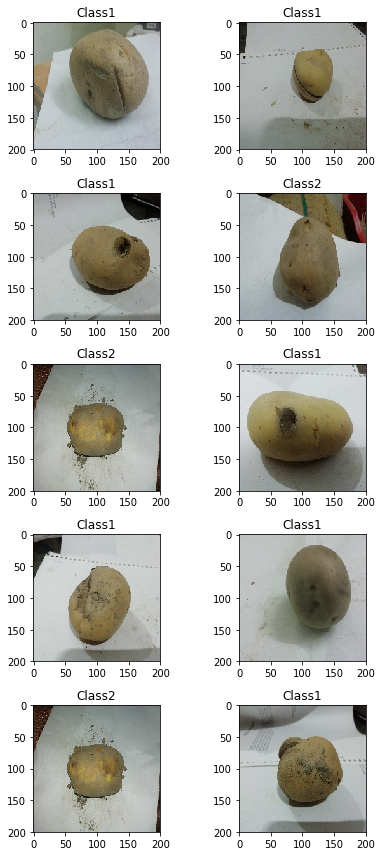

In [ ]:
view_random_images(X,y, random_state = 10)

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y,2)

In [ ]:
X = (np.array(X))/255
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15, random_state = 42)
del X
del y

In [ ]:
np.random.seed(42)
X_train.shape

(347, 200, 200, 3)

In [ ]:
num_classes = 2
my_new_model = Sequential()
my_new_model.add(DenseNet169(include_top=False, pooling='avg', weights='imagenet'))
my_new_model.add(Dense(num_classes, activation='softmax'))

51879936/51877672 [==============================] - 1s 0us/step


In [ ]:
my_new_model.layers[0].trainable = False


In [ ]:
my_new_model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=45,  
        zoom_range = 0.16, 
        width_shift_range=0.32,  
        height_shift_range=0.32,  
        horizontal_flip=True,  
        vertical_flip=True)  

   
datagen.fit(X_train)

In [ ]:
batch_size = 35
epochs = 50
chk = ModelCheckpoint("myModel.h5", monitor='val_acc', save_best_only=True) 
callbacks_list = [chk]
train = my_new_model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0]//20)

#save best True saves only if the metric improves



Epoch 1/50
17/17 [==============================] - 219s 13s/step - loss: 0.5521 - acc: 0.7401 - val_loss: 0.4282 - val_acc: 0.7903
Epoch 2/50
17/17 [==============================] - 205s 12s/step - loss: 0.3374 - acc: 0.8592 - val_loss: 0.3508 - val_acc: 0.8226
Epoch 3/50
17/17 [==============================] - 205s 12s/step - loss: 0.2941 - acc: 0.8978 - val_loss: 0.2702 - val_acc: 0.9194
Epoch 4/50
17/17 [==============================] - 205s 12s/step - loss: 0.2369 - acc: 0.9074 - val_loss: 0.2924 - val_acc: 0.8226
Epoch 5/50
17/17 [==============================] - 206s 12s/step - loss: 0.1947 - acc: 0.9369 - val_loss: 0.2201 - val_acc: 0.9194
Epoch 6/50
17/17 [==============================] - 205s 12s/step - loss: 0.2059 - acc: 0.9219 - val_loss: 0.1957 - val_acc: 0.9355
Epoch 7/50
17/17 [==============================] - 208s 12s/step - loss: 0.1443 - acc: 0.9558 - val_loss: 0.1967 - val_acc: 0.9194
Epoch 8/50
17/17 [==============================] - 203s 12s/step - loss: 0.

In [ ]:
my_new_model.save('my_model.h5')

In [ ]:
!ls

drive  sample_data


In [3]:
from keras.models import load_model
new_model = load_model('/content/drive/My Drive/my_model.h5')
new_model.summary()

OSError: ignored

In [ ]:
loss, acc = new_model.evaluate(X_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

62/62 [==============================] - 36s 585ms/step
Restored model, accuracy: 93.55%


In [ ]:
from google.colab import files
files.download('my_model.h5') 

In [ ]:
!cp my_model.h5 '/content/drive/My Drive/' 

In [ ]:
num_classes = 2

checkpoint_path = "./myModel2.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

my_new_model2 = Sequential()
my_new_model2.add(DenseNet121(include_top=False, pooling='avg', weights='imagenet'))
my_new_model2.add(Dense(num_classes, activation='softmax'))

In [ ]:
my_new_model2.layers[0].trainable = False


In [ ]:
my_new_model2.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 35
epochs = 50
chk = ModelCheckpoint(checkpoint_path,save_weights_only=True, monitor='val_loss', save_best_only=True) 
callbacks_list = [chk]
train = my_new_model2.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0]//20,callbacks = callbacks_list)

#save best True saves only if the metric improves



In [ ]:
!ls {checkpoint_dir}

In [ ]:
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('Loss Performance')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(train.history['acc'])
plt.plot(train.history['val_acc'])
plt.title('Accuracy Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
from google.colab import files
checkpoint_path  = "myModel2.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
!ls {checkpoint_dir}